In [ ]:
import os
file_path=r'E:\Shilong\murmur\circor_dataset_period\Absent\2530\2530_AV'
for root,dir,file in os.walk(file_path):
    for subfile in file:
        files=os.path.join(root,subfile)
        state=subfile.split("_")
        
        print(state[0])

In [ ]:
import librosa
def mfcc_feature(filename,sr=4000,nmfcc=13):
    data, samprate = librosa.load(filename)
    # 提取 MFCC feature
    mfcc = librosa.feature.mfcc(y=data, sr=samprate, n_mfcc=nmfcc)
    return mfcc

In [ ]:
import os
path=r'E:\Shilong\murmur\circor_dataset_period\train'
for root,dir,file in os.walk(path):
    for subdir in file:
        sub_dir=os.path.join(root,subdir)
        mfccc=mfcc_feature(sub_dir)
        print(mfccc.shape)


In [ ]:
import os
diastolic=list()
systolic=list()
s1=list()
s2=list()


file_path=r'E:\Shilong\murmur\circor_dataset_period\train'
for root,dir,file in os.walk(file_path):
    for subfile in file:
        files=os.path.join(root,subfile)
        print(files)
        mfccc=mfcc_feature(files)
        state=subfile.split("_")        
        if state[0]=='diastolic':
            diastolic.append(mfccc.shape[1])
        if state[0]=='systolic':
            systolic.append(mfccc.shape[1])
        if state[0]=='s1':
            s1.append(mfccc.shape[1])
        if state[0]=='s2':
            s2.append(mfccc.shape[1])
        

In [ ]:
# read the csv row_num-th row
def csv_reader_row(file_name,row_num):
    with open(file_name, 'r') as f:
        reader = csv.reader(f)
        row=list(reader)
    return row[row_num]

In [ ]:
# read csv file by column
# train_csv=pd.read_csv("F:/heart_data/2022_challenge/heart/training_data.csv",sep=',')
def csv_reader_cl(file_name,clo_num):
    with open(file_name,encoding='utf-8') as csvfile:
        reader=csv.reader(csvfile)
        column=[row[clo_num] for row in reader]
    return column

In [ ]:
def switch_if(x):
    # y=list()
    if x == "Absent\\":
        y = np.array([[1]])
    elif x == "Present\\":
        y = np.array([[0]])
    return y

In [ ]:
import numpy as np
import os
n_input=13
file_path=r'E:\Shilong\murmur\circor_dataset_period\train'
for root,dir,file in os.walk(file_path):
    for subfile in file:
        files=os.path.join(root,subfile)
        print(subfile)
        # mfcck=mfcc_feature(files)
        # output = switch_if(mur)   
        # # print(mfcck.size)         
        # mfcck_1 = mfcck.reshape(1,mfcck.size)
        # if(mfcck.size<=n_input):
        #     #补至104，其余补0
        #     mfcck_2 = np.pad(mfcck_1, (0, n_input-mfcck.size), 'constant', constant_values=(0, 0))
        #     all = np.hstack((output,mfcck_2))                    
        #     WAV_feature = np.vstack((WAV_feature,all))
        #     length_file = length_file + 1

In [ ]:
import numpy as np
print(np.max(diastolic),np.min(diastolic),np.mean(diastolic))
print(np.max(systolic),np.min(systolic),np.mean(systolic))
print(np.max(s1),np.min(s1),np.mean(s1))
print(np.max(s2),np.min(s2),np.mean(s2))

In [ ]:
# Author: Shilong
# Creat Data: 2023-6-16
# Modify Date:2023-
# Description: load fin-tuned BEATs model  
"""
Load Tokenizers
"""

# import torch
# from Tokenizers import TokenizersConfig, Tokenizers

# # load the pre-trained checkpoints
# checkpoint = torch.load(r'E:\Shilong\murmur\03_Classifier\LM\BEATs\Tokenizer_iter2.pt')

# cfg = TokenizersConfig(checkpoint['cfg'])
# BEATs_tokenizer = Tokenizers(cfg)
# BEATs_tokenizer.load_state_dict(checkpoint['model'])
# BEATs_tokenizer.eval()

# # tokenize the audio and generate the labels
# audio_input_16khz = torch.randn(1, 10000)
# padding_mask = torch.zeros(1, 10000).bool()

# labels = BEATs_tokenizer.extract_labels(audio_input_16khz, padding_mask=padding_mask)

"""
Load Pre-Trained Models
"""
# %matplotlib inline
import torch,os,torchvision
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, models, transforms
from PIL import Image
from sklearn.model_selection import StratifiedShuffleSplit
torch.__version__
import csv
import librosa
from BEATs import BEATs, BEATsConfig
from BEATs_def import get_patientid

print("========================load data========================")
murmur_positoin=['_AV','_MV','_PV','_TV']
murmur_ap=["Absent\\","Present\\"]
period=["s1", "systolic", "s2", "diastolic"]

file_path=r'E:\Shilong\murmur\circor_dataset_period\train'
# get absent / present patient_id
absent_csv=r'E:\Shilong\murmur\03_Classifier\MurmurDectection\absent_id.csv'
present_csv=r'E:\Shilong\murmur\03_Classifier\MurmurDectection\present_id.csv'
absent_patient_id=get_patientid(absent_csv)
present_patient_id=get_patientid(present_csv)

print("========================load model==========================")

# load the pre-trained checkpoints
checkpoint = torch.load(r'E:\Shilong\murmur\03_Classifier\LM\BEATs\BEATs_iter2.pt')

cfg = BEATsConfig(checkpoint['cfg'])
BEATs_model = BEATs(cfg)
BEATs_model.load_state_dict(checkpoint['model'])
BEATs_model.eval()
# extract the the audio representation
audio_input_16khz = torch.randn(1, 10000)
padding_mask = torch.zeros(1, 10000).bool()

# representation = BEATs_model.extract_features(audio_input_16khz, padding_mask=padding_mask)[0]

print("========================extract features==========================")

In [ ]:
path=r'E:\Shilong\murmur\circor_dataset_period'
for mur in murmur_ap:
    for patient_id in absent_patient_id:
        for pos in murmur_positoin:
            dir_path=path+"\\"+mur+patient_id+"\\"+patient_id+pos
            wav_path=dir_path+".wav"
            print("wav_path"+wav_path)
            if os.path.exists(wav_path):
                y, sr = librosa.load(wav_path, sr=2000)
                # y_16k = librosa.resample(y, sr, 16000)
                wav = torch.tensor(y)
                # 增加一个维度满足输入要求
                wav = wav.unsqueeze(0)
                rep = BEATs_model.extract_features(wav)[0]
                rep = torch.squeeze(rep).detach().cpu().numpy()
                feature = pd.DataFrame(rep)
                save_path = path + "\\" + mur + "\\" + patient_id +"\\"+ patient_id + pos+ ".csv"
                print("save_path"+save_path)
                feature.to_csv(save_path, index=False, header=False)

In [ ]:
filepath=r'E:\Shilong\murmur\circor_dataset_period'
def get_mfcc_features(mur,path,id=present_patient_id,position=murmur_positoin):    
    for patient_id in id:
        for pos in position:
            dir_path=path+"\\"+mur+patient_id+"\\"+patient_id+pos
            wav_path=dir_path+".wav"
            print("wav_path"+wav_path)
            if os.path.exists(wav_path):
                y, sr = librosa.load(wav_path, sr=2000)
                # y_16k = librosa.resample(y, sr, 16000)
                wav = torch.tensor(y)
                # 增加一个维度满足输入要求
                wav = wav.unsqueeze(0)
                rep = BEATs_model.extract_features(wav)[0]
                rep = torch.squeeze(rep).detach().cpu().numpy()
                feature = pd.DataFrame(rep)
                save_path = path + "\\" + mur + "\\" + patient_id +"\\"+ patient_id + pos+ ".csv"
                print("save_path"+save_path)
                feature.to_csv(save_path, index=False, header=False)
    return feature
absent_features=feature
# absent_features=get_mfcc_features(murmur_ap[0],filepath,present_patient_id)# absent
present_features=get_mfcc_features(murmur_ap[1],filepath,present_patient_id)# present

In [ ]:
import soundfile
import numpy as np
import librosa

In [ ]:
def index_load(tsvname):
   #读取tsv文件内容,不需要close函数
   with open(tsvname, 'r') as f:
    txt_data = f.read()
    head=['start','end','period']
    data=txt_data.split('\n')[:-1]
    #遍历每一行
    for l in data:
        sgmt=l.split('\t')
        if sgmt[2]!='0':
            head=np.vstack([head,sgmt])
   return head[1:]

In [ ]:
# switch period
def switch_period(period):
    if  period=='1':
        location="s1"
        # num1=num1+1

    elif  period=='2':
        location="systolic"
        # num2=num2+1

    elif  period=='3':
        location="s2"
        # num3=num3+1

    elif  period=='4':
        location="diastolic"
        # num4=num4+1

    return location

In [ ]:
# preprocessed PCGs were segmented into four heart sound states
def state_div(tsvname,wavname,state_path,index):
    # 获取周期时间点
    # type:array
    index_file=index_load(tsvname)
    # print(index_file)
    # 获取array长度：a.shape[0]
    # 分割音频
    # states_num=[0,0,0,0]
    num=0

    for i in range(index_file.shape[0]-3):
        if index_file[i][2]=='1'and index_file[i+3][2]=='4':
            start_index=float(index_file[i][0])*1000
            end_index=float(index_file[i+3][1])*1000
            num=num+1
        print(start_index,end_index)
        # print("wav index")
        # print(wav_index)
        
        # print(start_index,end_index)
        # period_index=wav_index[2]
        
        # states_index=switch_period(wav_index[2])
        recording, fs = librosa.load(wavname,sr=1000)
        print("================================================================")
        # print("wav name: "+wavname)
        # print("fs is: "+str(fs))

        buff = recording[int(start_index) :  int(end_index) ]  # 字符串索引切割
        # print("buff len: "+str(len(buff)))
        # print("buff : "+str(buff))
        # print(buff)
        # buff.export(folder_path+mur+patient_id+"\\"+patient_id+pos+"{}{}+.wav".format(period_index,i), format="wav")
        # cut.append(buff)
        soundfile.write(state_path+"{}_{}.wav".format(index,num),buff,fs)

# tsv=r'E:\Shilong\murmur\LM_wav_dataset\Absent\2530\2530_TV.tsv'
# wav=r'E:\Shilong\murmur\LM_wav_dataset\Absent\2530\2530_TV.wav'
# path="E:\\Shilong\\murmur\\LM_wav_dataset\\Absent\\2530\\"
# state_div(tsv,wav,path,'a')

In [ ]:
# 切数据，命名格式为：id+pos+state+num
positoin=['_AV','_MV','_PV','_TV']
murmur=["Absent\\","Present\\"]
folder_path=r'E:\Shilong\murmur\LM_wav_dataset\\'
# file_path=folder_path+mur+patient_id+patient_id+pos+".tsv"
# path="E:\\01_Work\\02_SoftwareDesign\\circor_dataset_period\\"
def period_div(path,murmur,patient_id_list,positoin):
    for mur in murmur:
        for patient_id in patient_id_list:
            for pos in positoin:
                dir_path=path+mur+patient_id+"\\"+patient_id+pos
                tsv_path=dir_path+".tsv"
                wav_path=dir_path+".wav"
                if os.path.exists(tsv_path):
                    state_div(tsv_path,wav_path,dir_path+"\\",patient_id+pos)

period_div(folder_path,murmur,absent_patient_id,positoin)
period_div(folder_path,murmur,present_patient_id,positoin)
# period_div(folder_path,murmur,unknown_patient_id,positoin)

In [ ]:
tsv=r'E:\Shilong\murmur\LM_wav_dataset\Absent\2530\2530_TV.tsv'
index=index_load(tsv)
index[1][2]
index.shape[0]
for i in range(index.shape[0]-3):
    if index[i][2]=='1'and index[i+3][2]=='4':
        start=index[i][0]
        end=index[i+3][1]
        print(start,end)



In [ ]:
# import csv
# file_name=r'E:\Shilong\murmur\LM_wav_dataset\train_csv\2530_AV_1.wav.csv'
import pandas as pd
filename = r'E:\Shilong\murmur\LM_wav_dataset\train_csv\2530_AV_1.wav.csv'
df = pd.read_csv(filename,header=None)
print(df)

In [ ]:
import numpy as np
a=np.array(['1','1','1'])
type(a)

## 保存训练日志文件

In [ ]:

train_log_filename = "train_log.txt"
train_log_filepath = os.path.join(result_dir, train_log_filename)
train_log_txt_formatter = "{time_str} [Epoch] {epoch:03d} [Loss] {loss_str}\n"
to_write=train_log_txt_formatter.format(time_str=time.strtime(%Y_%n_%d_%H:%M:%S),
                                        epoch=epoch,
                                        loss_str=" ".join(["{}".format(loss)]))
with open(train_log_filepath,"a") as f:
    f.write(to_write)

## 保存训练变量（dataloader）


In [ ]:
with open('./train_loader.pkl','wb') as f:
    dill.dump(dataset,f) 

In [ ]:
torch.save(train_features,path)

In [ ]:
import torch
a=torch.zeros(2, 10000).bool()
a

## load NPY文件

In [ ]:
import numpy as np


loadData = np.load(r'E:\Shilong\murmur\03_Classifier\test_features.npy')

print("----type----")
print(type(loadData))
print("----shape----")
print(loadData.shape)
print("----data----")
print(loadData)


## 绘制混淆矩阵

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


def draw_confusion_matrix(label_true, label_pred, label_name, normlize, title="Confusion Matrix", pdf_save_path=None, dpi=100):
    """

    @param label_true: 真实标签，比如[0,1,2,7,4,5,...]
    @param label_pred: 预测标签，比如[0,5,4,2,1,4,...]
    @param label_name: 标签名字，比如['cat','dog','flower',...]
    @param normlize: 是否设元素为百分比形式
    @param title: 图标题
    @param pdf_save_path: 是否保存，是则为保存路径pdf_save_path=xxx.png | xxx.pdf | ...等其他plt.savefig支持的保存格式
    @param dpi: 保存到文件的分辨率，论文一般要求至少300dpi
    @return:

    example：
            draw_confusion_matrix(label_true=y_gt,
                          label_pred=y_pred,
                          label_name=["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"],
                          normlize=True,
                          title="Confusion Matrix on Fer2013",
                          pdf_save_path="Confusion_Matrix_on_Fer2013.png",
                          dpi=300)

    """
    cm = confusion_matrix(label_true, label_pred)
    if normlize:
        row_sums = np.sum(cm, axis=1)  # 计算每行的和
        cm = cm / row_sums[:, np.newaxis]  # 广播计算每个元素占比
    cm=cm.T
    plt.imshow(cm, cmap='Blues')
    plt.title(title)
    plt.xlabel("Predict label")
    plt.ylabel("Truth label")
    plt.yticks(range(label_name.__len__()), label_name)
    plt.xticks(range(label_name.__len__()), label_name, rotation=45)

    plt.tight_layout()
    plt.colorbar()

    for i in range(label_name.__len__()):
        for j in range(label_name.__len__()):
            color = (1, 1, 1) if i == j else (0, 0, 0)	# 对角线字体白色，其他黑色
            value = float(format('%.2f' % cm[i, j]))
            plt.text(i, j, value, verticalalignment='center', horizontalalignment='center', color=color)

    # plt.show()
    if not pdf_save_path is None:
        plt.savefig(pdf_save_path, bbox_inches='tight',dpi=dpi)


In [ ]:
labels_name=['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

y_gt=[]
y_pred=[]
for index, (labels, imgs) in enumerate(test_loader):
    labels_pd = model(imgs)
    predict_np = np.argmax(labels_pd.cpu().detach().numpy(), axis=-1)   # array([0,5,1,6,3,...],dtype=int64)
    labels_np = labels.numpy()                                          # array([0,5,0,6,2,...],dtype=int64)
	
    y_pred.append(labels_np)
    y_gt.append(labels_np)
    
draw_confusion_matrix(label_true=y_gt,			# y_gt=[0,5,1,6,3,...]
                      label_pred=y_pred,	    # y_pred=[0,5,1,6,3,...]
                      label_name=["An", "Di", "Fe", "Ha", "Sa", "Su", "Ne"],
                      normlize=True,
                      title="Confusion Matrix on Fer2013",
                      pdf_save_path="Confusion_Matrix_on_Fer2013.jpg",
                      dpi=300)


## 召回率计算

In [ ]:
from sklearn.metrics import recall_score

pred = [0, 1, 0, 1] # 预测的值
target = [0, 1, 1, 0] # 真实的值

r = recall_score(pred, target)

print(r)



如果不是 0 1 的值，是其他二分类的值，那么就可以通过 labels、pos_label 来指定

In [ ]:
labels = [3,4]  # 二分类 两个类别的值

pred = [3, 4, 3, 4] # 预测的值

target = [3, 4, 4, 3] # 真实的值

r = recall_score(pred, target , labels = labels , pos_label= 3) # pos_label指定正样本的值是多少

print(r)



## 可视化
YAMNet 还会返回一些可用于可视化的附加信息。我们看一下波形、声谱图和推断的热门类。

In [ ]:

plt.figure(figsize=(10, 6))

# Plot the waveform.
plt.subplot(3, 1, 1)
plt.plot(waveform)
plt.xlim([0, len(waveform)])

# Plot the log-mel spectrogram (returned by the model).
plt.subplot(3, 1, 2)
plt.imshow(spectrogram_np.T, aspect='auto', interpolation='nearest', origin='lower')

# Plot and label the model output scores for the top-scoring classes.
mean_scores = np.mean(scores, axis=0)
top_n = 10
top_class_indices = np.argsort(mean_scores)[::-1][:top_n]
plt.subplot(3, 1, 3)
plt.imshow(scores_np[:, top_class_indices].T, aspect='auto', interpolation='nearest', cmap='gray_r')

# patch_padding = (PATCH_WINDOW_SECONDS / 2) / PATCH_HOP_SECONDS
# values from the model documentation
patch_padding = (0.025 / 2) / 0.01
plt.xlim([-patch_padding-0.5, scores.shape[0] + patch_padding-0.5])
# Label the top_N classes.
yticks = range(0, top_n, 1)
plt.yticks(yticks, [class_names[top_class_indices[x]] for x in yticks])
_ = plt.ylim(-0.5 + np.array([top_n, 0]))

## 筛选样本

划分train-set,val-set,test-set

In [ ]:
def split_data(data_frame, train_samples, val_samples):
    train_dfs = []
    val_dfs = []
    test_dfs = []
    for category, group in data_frame.groupby("category"):
        train_df = group.sample(n=train_samples)
        group = group.drop(train_df.index)
        val_df = group.sample(n=val_samples)
        group = group.drop(val_df.index)
        test_df = group
        train_dfs.append(train_df)
        val_dfs.append(val_df)
        test_dfs.append(test_df)
    train_df = pd.concat(train_dfs)
    val_df = pd.concat(val_dfs)
    test_df = pd.concat(test_dfs)
    return train_df, val_df, test_df

## 编码，产生掩蔽，对label编码

In [ ]:
class AudioDataset(Dataset):
    def __init__(self, root_dir, data_frame, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.data_frame = data_frame

        self.label_encoder = LabelEncoder()
        self.label_encoder.fit(self.data_frame["category"])

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        audio_path = os.path.join(self.root_dir, self.data_frame.iloc[idx]["filename"])
        label = self.data_frame.iloc[idx]["category"]

        # Load audio data and perform any desired transformations
        sig, sr = librosa.load(audio_path, sr=16000, mono=True)
        sig_t = torch.tensor(sig)
        padding_mask = torch.zeros(1, sig_t.shape[0]).bool().squeeze(0)
        if self.transform:
            sig_t = self.transform(sig_t)

        # Encode label as integer
        label = self.label_encoder.transform([label])[0]

        return sig_t, padding_mask, label

## 继承LightningDataModule，产生trainset和valset的dataloader

In [ ]:
class ECS50DataModule(LightningDataModule):
    def __init__(
        self,
        root_dir: str = "/data/ESC-50-master/audio/",
        csv_file: str = "/data/ESC-50-master/meta/esc50.csv",
        batch_size: int = 8,
        split_ratio=0.8,
        transform=None,
        **kwargs
    ):
        super().__init__(**kwargs)
        self.root_dir = root_dir
        self.csv_file = csv_file
        self.batch_size = batch_size
        self.split_ratio = split_ratio
        self.transform = transform

        self.setup()

    def prepare_data(self):
        pass

    def setup(self, stage=None):
        data_frame = pd.read_csv(self.csv_file)
        data_frame = data_frame.sample(frac=1).reset_index(
            drop=True
        )  # shuffle the data frame
        split_index = int(len(data_frame) * self.split_ratio)
        self.train_set = data_frame.iloc[:split_index, :]
        self.val_set = data_frame.iloc[split_index:, :]

    def train_dataloader(self):
        train_df = AudioDataset(
            root_dir=self.root_dir, data_frame=self.train_set, transform=self.transform
        )

        return DataLoader(train_df, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        val_df = AudioDataset(
            root_dir=self.root_dir, data_frame=self.val_set, transform=self.transform
        )

        return DataLoader(val_df, batch_size=self.batch_size, shuffle=False)

In [ ]:
import logging
from datetime import datetime
import sys
def logger_init(log_level=logging.INFO,
                log_dir='./ResultFile/',
                ):
    # 指定路径
    if not os.path.exists(log_dir):
        os.makedirs(log_dir)
  
    log_path = os.path.join(log_dir, '_' + str(datetime.now())[:10] + '.txt')
    formatter = '[%(asctime)s] - %(levelname)s: %(message)s'
    logging.basicConfig(level=log_level,
                        format=formatter,
                        datefmt='%Y-%d-%m %H:%M:%S',
                        handlers=[logging.FileHandler(log_path),
                                logging.StreamHandler(sys.stdout)]
                            )


In [ ]:
def csv_reader_row(file_name,row_num):
    with open(file_name, 'r') as f:
        reader = csv.reader(f)
        row=list(reader)
    return row[row_num]

def csv_reader_cl(file_name,clo_num):
    with open(file_name, 'r') as f:
        reader = csv.reader(f)
        column = [row[clo_num] for row in reader]
    return column

import csv
csv_path="E:\\Shilong\\murmur\\dataset_all\\training_data.csv"
# csv_path="E:\\Shilong\\murmur\\circor_digiscope_dataset\\training_data.csv"

# get dataset tag from table
row_line=csv_reader_row(csv_path,0)
tag_list=list()
# get index for 'Patient ID' and 'Outcome'
tag_list.append(row_line.index('Patient ID'))
tag_list.append(row_line.index('Murmur'))
tag_list.append(row_line.index('Murmur locations'))
tag_list.append(row_line.index('Systolic murmur timing'))
tag_list.append(row_line.index('Diastolic murmur timing'))
# for tag_index in tag_list:
id_data=csv_reader_cl(csv_path,tag_list[0])
Murmur=csv_reader_cl(csv_path,tag_list[1])
Murmur_locations=csv_reader_cl(csv_path,tag_list[2])
Systolic_murmur_timing=csv_reader_cl(csv_path,tag_list[3])
Diastolic_murmur_timing=csv_reader_cl(csv_path,tag_list[4])

In [ ]:
absent_id  = [out for out,Murmur in enumerate(Murmur) if Murmur=='Absent']
present_id = [out for out,Murmur in enumerate(Murmur) if Murmur=='Present']
# print(dict(enumerate(id_data[1:])))


In [ ]:
import csv
import os
import librosa
import numpy as np
import pandas as pd

def index_load(tsvname):
    """读取tsv文件内容,不需要close函数"""
    with open(tsvname, 'r') as f:
        txt_data = f.read()
    head=['start','end','period']
    data=txt_data.split('\n')[:-1]
    #遍历每一行
    for l in data:
        sgmt=l.split('\t')
        if sgmt[2]!='0':
            head=np.vstack([head,sgmt])
    return head[1:]

def state_div(tsvname,wavname,state_path,index):
    index_file=index_load(tsvname)
    recording, fs = librosa.load(wavname,sr=4000)
    num=0
    start_index2=0
    end_index2=0
    start_index4=0
    end_index4=0

    for i in range(index_file.shape[0]-3):
        if index_file[i][2]=='2'and index_file[i+2][2]=='4':
            start_index2=float(index_file[i][0])*fs
            end_index2=float(index_file[i][1])*fs
            start_index4=float(index_file[i+2][0])*fs
            end_index4=float(index_file[i+2][1])*fs
            num=num+1
            #  解决出现_0.wav的问题
            print(start_index2,end_index2,start_index4,end_index4)            
            print("=============================================")
            print("wav name: "+wavname)        
            buff2 = recording[int(start_index2) :int(end_index2) ]  # 字符串索引切割
            buff4 = recording[int(start_index4) :int(end_index4) ]  # 字符串索引切割
            print("buff2 len: "+str(len(buff2)),"buff4 len: "+str(len(buff4)))
            # soundfile.write(state_path+"{}_{}_{}.wav".format(index,'Systolic' ,num),buff2,fs)
            # soundfile.write(state_path+"{}_{}_{}.wav".format(index,'Diastolic',num),buff4,fs)

def period_div(path,murmur,patient_id_list,positoin):
    for mur in murmur:
        for patient_id in patient_id_list:
            for pos in positoin:
                dir_path=path+mur+patient_id+"\\"+patient_id+pos
                tsv_path=dir_path+".tsv"
                wav_path=dir_path+".wav"
                if os.path.exists(tsv_path):
                    state_div(tsv_path,wav_path,dir_path+"\\",patient_id+pos)

def get_patientid(csv_path):
    # 'import csv' is required
    with open(csv_path) as csvfile:
        reader = csv.reader(csvfile)
        id = [row[0] for row in reader]   # weight 同列的数据
    return id

murmur=["Absent\\","Present\\"]
positoin=['_AV','_MV','_PV','_TV']
folder_path=r'E:\Shilong\murmur\03_circor_states\\'
absent_csv_path=r'E:\Shilong\murmur\03_Classifier\LM\BEATs\absent_id.csv'
absent_patient_id=get_patientid(absent_csv_path)
period_div(folder_path,murmur,absent_patient_id,positoin)     

In [ ]:
import torchaudio.compliance.kaldi as ta_kaldi
import torch

waveform = torch.randn(1, 2800)
fbank = ta_kaldi.fbank(waveform, num_mel_bins=128, sample_frequency=16000, frame_length=25, frame_shift=10)
 

In [ ]:
def cal_len(dir_path,csv_path,Murmur:str,id_data,Murmur_locations):
    slen=[]
    dlen=[]
    # label=[]
    if not os.path.exists(csv_path):
        os.makedirs(csv_path)

    for root,dir,file in os.walk(dir_path):
        for subfile in file:
            wav_path=os.path.join(root,subfile)            
            if os.path.exists(wav_path):
                # 数据读取
                print("reading: "+subfile)
                y, sr = librosa.load(wav_path, sr=4000)
                y_16k = librosa.resample(y=y, orig_sr=sr, target_sr=16000)
                print("y_16k size: "+str(y_16k.size))
                if subfile.split('_')[2] == 'Systolic':
                    slen.append(y_16k.size)
                else:
                    dlen.append(y_16k.size)    
    return np.array(slen),np.array(dlen)

slen,dlen=cal_len(absent_train_path,absent_train_csv_path,'Absent',id_data,Murmur_locations)# absent

In [ ]:
import torch
import numpy as np
a=np.array([1,2,3,4,5,6,7,8,9,10])
b=torch.tensor(a)
b


In [ ]:
absent_train_csv_path = r'D:\Shilong\murmur\03_circor_states\train_csv'
absent_test_csv_path = r'D:\Shilong\murmur\03_circor_states\test_csv'
present_train_csv_path = r'D:\Shilong\murmur\03_circor_states\train_csv'
present_test_csv_path = r'D:\Shilong\murmur\03_circor_states\test_csv'

filepath=r'D:\Shilong\murmur\03_circor_states'
absent_train_path=r'D:\Shilong\murmur\03_circor_states\train\Absent'
absent_test_path=r'D:\Shilong\murmur\03_circor_states\test\Absent'
present_train_path=r'D:\Shilong\murmur\03_circor_states\train\Present'
present_test_path=r'D:\Shilong\murmur\03_circor_states\test\Present'

atslen,atdlen=cal_len(absent_train_path,absent_train_csv_path,'Absent',id_data,Murmur_locations)# absent
avslen,avdlen=cal_len(absent_test_path,absent_test_csv_path,'Absent',id_data,Murmur_locations)# absent
ptslen,ptdlen=cal_len(present_train_path,present_train_csv_path,'Present',id_data,Murmur_locations)# absent
pvslen,pvdlen=cal_len(present_test_path,present_test_csv_path,'Present',id_data,Murmur_locations)# absent

atslen_path=r'D:\Shilong\murmur\03_circor_states\atslen.csv'
atdlen_path=r'D:\Shilong\murmur\03_circor_states\atdlen.csv'
avslen_path=r'D:\Shilong\murmur\03_circor_states\avslen.csv'
avdlen_path=r'D:\Shilong\murmur\03_circor_states\avdlen.csv'
ptslen_path=r'D:\Shilong\murmur\03_circor_states\ptslen.csv'
ptdlen_path=r'D:\Shilong\murmur\03_circor_states\ptdlen.csv'
pvslen_path=r'D:\Shilong\murmur\03_circor_states\pvslen.csv'
pvdlen_path=r'D:\Shilong\murmur\03_circor_states\pvdlen.csv'

pd.DataFrame(atslen).to_csv(atslen_path, index=False, header=False)
pd.DataFrame(atdlen).to_csv(atdlen_path, index=False, header=False)
pd.DataFrame(avslen).to_csv(avslen_path, index=False, header=False)
pd.DataFrame(avdlen).to_csv(avdlen_path, index=False, header=False)
pd.DataFrame(ptslen).to_csv(ptslen_path, index=False, header=False)
pd.DataFrame(ptdlen).to_csv(ptdlen_path, index=False, header=False)
pd.DataFrame(pvslen).to_csv(pvslen_path, index=False, header=False)
pd.DataFrame(pvdlen).to_csv(pvdlen_path, index=False, header=False)

In [ ]:
import os
import shutil
absent_1=0
persent_1=0
absent_2=0
persent_2=0


file_path_train=r'D:\Shilong\murmur\03_circor_states\train'
file_path_test=r'D:\Shilong\murmur\03_circor_states\test'
target_dir_train_a=r'D:\Shilong\murmur\03_circor_states\trainset\absent'
target_dir_train_p=r'D:\Shilong\murmur\03_circor_states\trainset\present'
target_dir_test_a=r'D:\Shilong\murmur\03_circor_states\testset\absent'
target_dir_test_p=r'D:\Shilong\murmur\03_circor_states\testset\present'

for root,dir,file in os.walk(file_path_train):
    for subfile in file:
        files=os.path.join(root,subfile)
        print(subfile)
        state=subfile.split("_")[4]        
        if state=='Absent':
            shutil.copy(files, target_dir_train_a + "\\")
        if state=='Present':
            shutil.copy(files, target_dir_train_p + "\\")

for root,dir,file in os.walk(file_path_test):
    for subfile in file:
        files=os.path.join(root,subfile)
        print(subfile)
        state=subfile.split("_")[4]        
        if state=='Absent':
            shutil.copy(files, target_dir_test_a + "\\")
        if state=='Present':
            shutil.copy(files, target_dir_test_p + "\\")



## Audio data augmentation

Speed tuning

In [ ]:
speed_rate = np.random.uniform(0.7,1.3)
wav_speed_tune = cv2.resize(wav, (1, int(len(wav) * speed_rate))).squeeze()
print('speed rate: %.3f' % speed_rate, '(lower is faster)')
if len(wav_speed_tune) < 16000:
    pad_len = 16000 - len(wav_speed_tune)
    wav_speed_tune = np.r_[np.random.uniform(-0.001,0.001,int(pad_len/2)),
                           wav_speed_tune,
                           np.random.uniform(-0.001,0.001,int(np.ceil(pad_len/2)))]
else: 
    cut_len = len(wav_speed_tune) - 16000
    wav_speed_tune = wav_speed_tune[int(cut_len/2):int(cut_len/2)+16000]
print('wav length: ', wav_speed_tune.shape[0])
ipd.Audio(wav_speed_tune, rate=sr)

Mix background noise & volume tuning

In [ ]:
bg_files = os.listdir('../input/train/audio/_background_noise_/')
bg_files.remove('README.md')
chosen_bg_file = bg_files[np.random.randint(6)]
bg, sr = librosa.load('../input/train/audio/_background_noise_/'+chosen_bg_file, sr=None)
print(chosen_bg_file,'|', bg.shape[0], bg.max(), bg.min())
ipd.Audio(bg, rate=sr) # !! be prepared when playing the noise, bacause it's so ANNOYING !!

start_ = np.random.randint(bg.shape[0]-16000)
bg_slice = bg[start_ : start_+16000]
wav_with_bg = wav * np.random.uniform(0.8, 1.2) + \
              bg_slice * np.random.uniform(0, 0.1)
ipd.Audio(wav_with_bg, rate=sr) 

stretching the sound

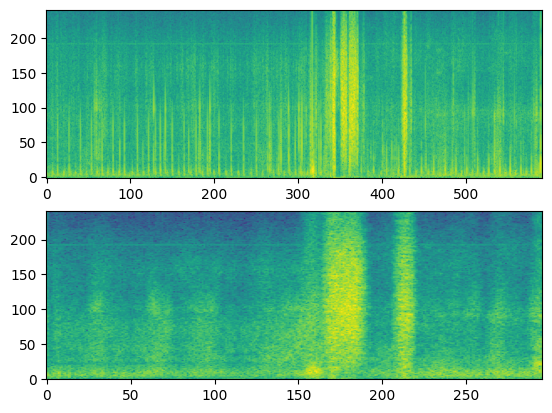

In [3]:
import librosa
import matplotlib.pyplot as plt
import matplotlib as mpl
import IPython.display as ipd
import numpy as np
import soundfile
def stretch(data, rates):   
    data = librosa.effects.time_stretch(data, rate=rates)
    return data
    

def get_spectrogram(wav):
    D = librosa.stft(wav, n_fft=480, hop_length=160,
                     win_length=480, window='hamming')
    spect, phase = librosa.magphase(D)
    return spect
    
if __name__ == "__main__":
    data,sr=librosa.load(r'D:\Shilong\murmur\03_circor_states\Absent\2530\2530_AV\.wav', sr=4000)
    data_stretch =stretch(data, 2)


    data_stretch_log_spect = 20*np.log10(get_spectrogram(data_stretch))
    data_log_spect = np.log(get_spectrogram(data))
    # soundfile.write(r"D:\Shilong\murmur\03_circor_states\Absent\2530\2530AV.wav",
    #             data,
    #             sr*2,
    #         )
    soundfile.write(r"D:\Shilong\murmur\03_circor_states\Absent\2530_AV.wav",
    data_stretch,
    sr,
            )

   
    plt.title('spectrogram of origin audio and stretch audio')
    plt.subplot(2, 1, 1)   
    plt.imshow(data_log_spect, aspect='auto', origin='lower',)    
    plt.subplot(2, 1, 2)
    plt.imshow(data_stretch_log_spect, aspect='auto', origin='lower',)

    plt.show()

torch.Size([1, 128, 588])
torch.Size([128, 588])


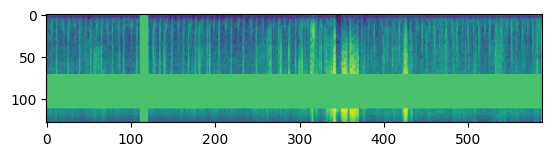

In [11]:
import torch, torchaudio
from matplotlib import pyplot as plt


waveform, _ = torchaudio.load(r'D:\Shilong\murmur\03_circor_states\Absent\2530\2530_AV.wav')
fbank = torchaudio.compliance.kaldi.fbank(waveform, htk_compat=True, sample_frequency=16000, use_energy=False, window_type='hanning', num_mel_bins=128, dither=0.0, frame_shift=10)

freqm = torchaudio.transforms.FrequencyMasking(48)
timem = torchaudio.transforms.TimeMasking(1000)
fbank = torch.transpose(fbank, 0, 1)

# NOTE this line, this is the trick, new torchaudio expect [1, freq, time] while old support [freq, time]
# comment this line will lead to an issue.
fbank = fbank.unsqueeze(0)
print(fbank.shape)
fbank = freqm(fbank)

plt.imshow(fbank[0].cpu().numpy())

fbank = timem(fbank)

plt.imshow(fbank[0].cpu().numpy())
fbank = fbank.squeeze(0)
print(fbank.shape)